In [4]:
# Libraries to be loaded. Some of them must be downloaded
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

# I use a conda environment to work with Pyhton. To download a new package, (e.g., scikit-learn),
# open a conda prompt and type
# conda install -c conda-forge scikit-learn
# You can also use "pip" to install packages. 
# Searching on Google "install package" will always help. There are plenty of useful entries. 

# As you will see, sintaxis on Python is library.function(), library.object(), etc. 
# Since "pandas" has been imported as "pd", the call to read_csv() function corresponds to 
# "pandas" module.


# Store current working directory 
cwd = os.getcwd()

# Declare dataset path and get into it
# Clarifications: format r"PATH" is due to the fact that Windows OS is used. If you used Linux, "r" character won't
# be needed to decode the path. 
DATASET_PATH = r"C:\Users\aralmeida\OneDrive - Universidad de Las Palmas de Gran Canaria\Doctorado\Bases de datos\Diabetes\STENO DMT1" # Change it with your path

# Path to store results 
STORE_PATH = r"C:\Users\aralmeida\OneDrive - Universidad de Las Palmas de Gran Canaria\Doctorado\codigo\synthetic_data_generation_framework\edu" # Change it with your path

# File name 
filename = "sampleData.csv"

# Go to dataset path
os.chdir(DATASET_PATH)

# Load data into a DataFrame
# A DataFrame is basically a matrix that can contain any type of data (int, float, object, etc.), with a first row containing the name
# of each variable/feature
# More info on https://pandas.pydata.org/
data = pd.read_csv(filename)

# After reading, come back to working directory 
os.chdir(cwd)


Dataset dimensions: 1000 x 14



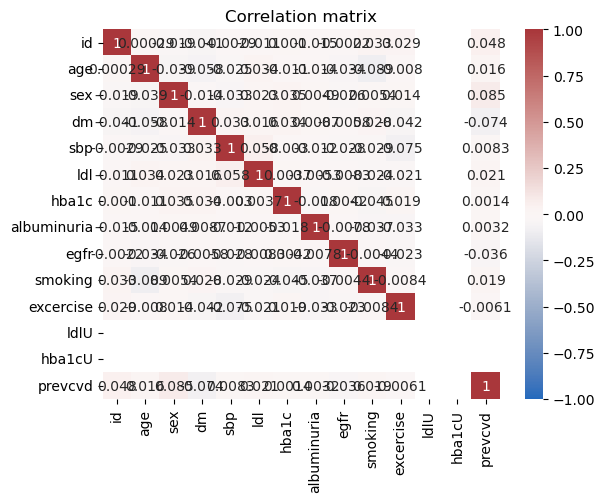

In [5]:
# I assume that you have used Jamovi for the Expolatory Data Analysys, yet I will drop some potentially useful functions here

# Prints dataset dimensions 
print("\nDataset dimensions: %d x %d\n" % (data.shape[0], data.shape[1]))

# Number of instances of missing data (Should be 0 since this datasets does not have empty values)
missing_data = data.isnull().sum()

# Computes and plot Pearson's correlation matrix
corr_matrix = data.corr()

plt.figure()
sn.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, cmap="vlag" ,annot=True)
plt.title("Correlation matrix")
plt.savefig('corr_matrix', dpi=600) # DPI stands for Dots Per Inch and sets the image resolution (> 300 is always recommended)  
plt.show()

In [6]:
# A first try without any pre-processing. (This might change with further iterations)

# Machine Learning models and hyperparameters declaration 
# Each Machine Learning models has a certain amounts of hyperparameters. This hyperparameters 
# are paramaters that can be tuned to optimized our models' performance. The optimization strategy
# for these classification/regresion problem is the same. Here I leave an example of four different
# models. More information at https://scikit-learn.org/stable/.


from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor   


# Models hyperparameters to be tuned and models declaration. The hyperparameters (e.g., "svm_params")
# are handled using the Python structure so-called "Dictionaries". According to literature, these are 
# the most relevant hyperparameters for each ML Model. 

# SVM (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)
svm_params = {"kernel" : ['rbf', 'linear'],
              "C" : [0.1, 1, 2.5, 5, 10],
              "gamma" : [0.01, 0.1, 1, 10],
              }
svm_model = SVR(cache_size=200, max_iter = -1)

# RF (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
rf_params = {"n_estimators": [20, 50, 100, 200], 
              "max_features": [2,3,5,7],
              }     
rf_model = RandomForestRegressor(random_state = 12345)

# XGB (Equivalent of XGB but in the scikit-learn library. 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)
# There is a new implementation that supposed to work faster (HistGradientBoostingRegressor)
xgb_params = {"learning_rate": [0.01, 0.1, 0.5],
              "n_estimators": [20, 50, 100, 200]
              }
xgb_model = GradientBoostingRegressor(random_state = 12345)

# KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
knn_params = {"n_neighbors": [6,8,10,12,14,16],
              "weights" : ['uniform','distance'],
              }
knn_model = KNeighborsRegressor(algorithm = 'auto', n_jobs = -1)

In [ ]:
# To train any Machine Learning Supervised model a Ground Truth is needed.
# This dataset has been downloaded from  https://steno.shinyapps.io/T1RiskEngine/,
# where a risk calculator is offered. 

# Calculation is implemented below, as a function. With this, an example of how a 
# function must be properly implemented and commented is offer

def steno_DM1_risk_calculator():

    CVD_risk_5_years = []
    CVD_risk_10_years = []
    
    return CVD_risk_5_years, CVD_risk_10_years

# Y vector to train the models is created from the dataset
Y = []

# A loop that goes accross the whole DataFrame and computes the risks is returned
for patients in data: 
    risk5, risk10 = steno_DM1_risk_calculator()

In [ ]:
# Once we have X (data) and Y, models can be trained
# In this case, we will use Grid Search hyperparameters optimization. 
# This method tests every possible combination of the whole group of
# set hyperparameters (svm_params, rf_params, etc.). More detailed info available
# at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

